In [6]:
!pip install pandas
##当！在前面时，则会像终端terminal一样运行代码

In [7]:
import pandas as pd      # import package
import csv
from urllib.request import urlopen
print(pd.__version__)

1.1.2


In [11]:
pd.Series([0,1,2,3,4,5,5.5,'hi'],index = ['one','two','three','four','five','six','seven','eight'])

one        0
two        1
three      2
four       3
five       4
six        5
seven    5.5
eight     hi
dtype: object

In [12]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df1= pd.DataFrame(data)
print(df1)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2


In [13]:
df1.set_index('state',inplace = True)

In [14]:
print(df1)

        year  pop
state            
Ohio    2000  1.5
Ohio    2001  1.7
Ohio    2002  3.6
Nevada  2001  2.4
Nevada  2002  2.9
Nevada  2003  3.2


In [ ]:
#*pandas的基本组成是series和dataframe,多个series的整合就是dataframe.

In [15]:
   
# Bitly link for: data/2019-sample-crime.csv
url='https://raw.githubusercontent.com/jreades/i2p/master/data/2019-sample-crime.csv'
df = pd.read_csv(url)    # load a (remote) CSV,header=NONE意为着第一行内容为空，并被0~10代替
print(type(df))                 # not simple data type
print(df.columns.values) # column names

<class 'pandas.core.frame.DataFrame'>
['ID' 'Case Number' 'Date' 'Primary Type' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Year' 'Latitude' 'Longitude']


In [16]:
df.describe() # Information about each Series(including count,mean,std,min,四分位点, 中点, max)

,ID,Year,Latitude,Longitude
count,1.000000e+02,100.0,100.000000,100.000000
mean,1.172479e+07,2019.0,41.845500,-87.674197
std,1.056492e+05,0.0,0.083776,0.055893
min,1.155667e+07,2019.0,41.666091,-87.836650
25%,1.163515e+07,2019.0,41.773812,-87.716710
50%,1.171914e+07,2019.0,41.866925,-87.669222
75%,1.180549e+07,2019.0,41.902087,-87.631061
max,1.193442e+07,2019.0,42.019399,-87.551446


In [33]:
df.info()     # Information about each Series and the df, 你可以看到所有相对于表格的type信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    100 non-null    int64  
 1   Case Number           100 non-null    object 
 2   Date                  100 non-null    object 
 3   Primary Type          100 non-null    object 
 4   Description           100 non-null    object 
 5   Location Description  97 non-null     object 
 6   Arrest                100 non-null    bool   
 7   Domestic              100 non-null    bool   
 8   Year                  100 non-null    int64  
 9   Latitude              100 non-null    float64
 10  Longitude             100 non-null    float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 7.4+ KB


In [18]:
print(type(df['Latitude']))          # type for column
print(type(df['Latitude'].values))   # type for values
print(df['Latitude'].values[:5])
print(df.Latitude.head(5))           # first five values
print(f"1: {df['Latitude'].mean()}") # summarise a series/column
print(f"2: {df.Latitude.mean()}")    # if no spaces in name

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[41.75130706 41.90399688 41.88032861 41.92438396 41.75579713]
0    41.751307
1    41.903997
2    41.880329
3    41.924384
4    41.755797
Name: Latitude, dtype: float64
1: 41.84550008439
2: 41.84550008439


In [35]:
df.head()

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude
0,11667185,JC237601,04/20/2019 11:00:00 PM,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,False,False,2019,41.751307,-87.603468
1,11909178,JC532226,12/02/2019 10:35:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,GROCERY FOOD STORE,False,False,2019,41.903997,-87.643230
2,11852571,JC462365,10/06/2019 04:50:00 PM,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,CLEANING STORE,True,True,2019,41.880329,-87.758473
3,11804855,JC405161,08/23/2019 10:00:00 PM,THEFT,OVER $500,STREET,False,False,2019,41.924384,-87.641442
4,11808164,JC409088,08/26/2019 12:00:00 AM,BATTERY,SIMPLE,ALLEY,False,False,2019,41.755797,-87.634426


In [20]:

df.sample(frac=0.3)           # a random 30% sample
df.sample(3, random_state=42) # set state of random number generator
df.sample(3, random_state=42) # will yield same sample

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude
83,11619311,JC181055,03/10/2019 05:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2019,41.749324,-87.670688
53,11708996,JC288587,06/02/2019 03:15:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,2019,41.972254,-87.726930
70,11580480,JC133698,01/29/2019 01:20:00 PM,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING IDENTIFICATION,STREET,True,False,2019,41.802612,-87.664807


In [22]:
df.sort_values(['Year','ID'], ascending=False)

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude
48,11934420,JC562647,12/28/2019 03:18:00 AM,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,GAS STATION,False,False,2019,41.750783,-87.625814
45,11932794,JC560715,12/26/2019 11:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,2019,41.883208,-87.634457
10,11930680,JC558223,12/23/2019 08:10:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,2019,41.830697,-87.614477
95,11923269,JC548861,12/13/2019 09:20:00 PM,ASSAULT,SIMPLE,RESTAURANT,False,False,2019,41.890384,-87.624110
1,11909178,JC532226,12/02/2019 10:35:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,GROCERY FOOD STORE,False,False,2019,41.903997,-87.643230
...,...,...,...,...,...,...,...,...,...,...,...
80,11570938,JC121904,01/11/2019 05:00:00 PM,THEFT,$500 AND UNDER,STREET,False,False,2019,41.846246,-87.628139
31,11568549,JC118941,01/16/2019 11:00:00 AM,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,False,2019,41.861081,-87.693790
43,11563106,JC112358,01/10/2019 11:58:00 PM,CRIMINAL DAMAGE,TO PROPERTY,SIDEWALK,False,False,2019,41.895764,-87.685558
60,11562562,JC111752,01/08/2019 07:00:00 PM,THEFT,OVER $500,RESIDENCE-GARAGE,False,False,2019,41.886511,-87.618196


In [23]:
df[
  df['Primary Type']=='ASSAULT'
]

,ID,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude
10,11930680,JC558223,12/23/2019 08:10:00 PM,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,2019,41.830697,-87.614477
29,11764675,JC356257,07/19/2019 10:00:00 PM,ASSAULT,SIMPLE,GAS STATION,False,False,2019,41.895561,-87.705846
31,11568549,JC118941,01/16/2019 11:00:00 AM,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,False,2019,41.861081,-87.693790
71,11629177,JC192913,03/20/2019 01:15:00 PM,ASSAULT,AGG PO HANDS NO/MIN INJURY,SIDEWALK,True,False,2019,41.803469,-87.739377
89,11888987,JC507074,11/11/2019 10:01:00 PM,ASSAULT,SIMPLE,APARTMENT,False,True,2019,41.998692,-87.683816
92,11589818,JC145197,02/06/2019 04:45:00 PM,ASSAULT,AGGRAVATED: HANDGUN,STREET,False,False,2019,41.793061,-87.703539
93,11688163,JC264411,05/15/2019 05:00:00 PM,ASSAULT,SIMPLE,APARTMENT,True,False,2019,41.753214,-87.595193
95,11923269,JC548861,12/13/2019 09:20:00 PM,ASSAULT,SIMPLE,RESTAURANT,False,False,2019,41.890384,-87.624110
97,11685629,JC261285,05/10/2019 05:15:00 PM,ASSAULT,AGG PRO.EMP: HANDGUN,"SCHOOL, PUBLIC, GROUNDS",False,False,2019,42.003359,-87.705800


In [24]:
df[df['Primary Type']=='ASSAULT'][['Longitude','Latitude']].mean()

Longitude   -87.673994
Latitude     41.869946
dtype: float64

In [26]:
print(df['Primary Type'].unique()) # Find unique values
print(df['Primary Type'].dtype.name)

['BURGLARY', 'DECEPTIVE PRACTICE', 'BATTERY', 'THEFT', 'NARCOTICS', ..., 'WEAPONS VIOLATION', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'INTERFERENCE WITH PUBLIC OFFICER']
Length: 15
Categories (15, object): ['BURGLARY', 'DECEPTIVE PRACTICE', 'BATTERY', 'THEFT', ..., 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'INTERFERENCE WITH PUBLIC OFFICER']
category


In [27]:
df['Primary Type'] = df['Primary Type'].astype('category')
print(df['Primary Type'].dtype.name)
print(df['Primary Type'].describe())

category
count       100
unique       15
top       THEFT
freq         28
Name: Primary Type, dtype: object


In [28]:
df.Date.to_list()[:3]

['04/20/2019 11:00:00 PM', '12/02/2019 10:35:00 AM', '10/06/2019 04:50:00 PM']

In [29]:
df['dt'] = pd.to_datetime(df.Date.values, 
              format="%m/%d/%Y %H:%M:%S %p")

In [34]:
df['dt'].dtype.name

'datetime64[ns]'

In [42]:
df['Primary Type'].cat.categories.to_list()

['ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CRIMINAL DAMAGE',
 'CRIMINAL SEXUAL ASSAULT',
 'DECEPTIVE PRACTICE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'OTHER OFFENSE',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

In [36]:
# Fix categories
mapping = {}
# df['Primary Type'].unique().to_list() also works
for x in df['Primary Type'].cat.categories.to_list():
    mapping[x]=x.title()
print(mapping)

{'ASSAULT': 'Assault', 'BATTERY': 'Battery', 'BURGLARY': 'Burglary', 'CRIMINAL DAMAGE': 'Criminal Damage', 'CRIMINAL SEXUAL ASSAULT': 'Criminal Sexual Assault', 'DECEPTIVE PRACTICE': 'Deceptive Practice', 'INTERFERENCE WITH PUBLIC OFFICER': 'Interference With Public Officer', 'MOTOR VEHICLE THEFT': 'Motor Vehicle Theft', 'NARCOTICS': 'Narcotics', 'OTHER OFFENSE': 'Other Offense', 'ROBBERY': 'Robbery', 'SEX OFFENSE': 'Sex Offense', 'STALKING': 'Stalking', 'THEFT': 'Theft', 'WEAPONS VIOLATION': 'Weapons Violation'}


In [44]:
df['Primary Type'] = df['Primary Type'].cat.rename_categories(mapping)

In [45]:
df['Primary Type']

0               Burglary
1     Deceptive Practice
2                Battery
3                  Theft
4                Battery
             ...        
95               Assault
96               Battery
97               Assault
98                 Theft
99             Narcotics
Name: Primary Type, Length: 100, dtype: category
Categories (15, object): ['Assault', 'Battery', 'Burglary', 'Criminal Damage', ..., 'Sex Offense', 'Stalking', 'Theft', 'Weapons Violation']

In [48]:
df.iloc[0:2,0:2] # List selection! (':' means 'all')
df.loc[0:2,['ID','Case Number']] # Dict selection

,ID,Case Number
0,11667185,JC237601
1,11909178,JC532226
2,11852571,JC462365


In [49]:
###Logics!!!!

In [50]:
x= True
y= False
if x:
  print("x")
if x and y:
  print("x and y")
if x or y:
  print("x or y")
if x and not y:
  print("x and not y")
if not(x and y):
  print("not x and y")

x
x or y
x and not y
not x and y


In [57]:
x=38
y=3
print(f"{x:b}") # `:b` means byte-format
print(f"{y:b}")

100110
11


In [55]:
print(f"{0:b}")
print("{0:b}".format( x & y ))

print("{0:b}".format( x | y ))

print("{0:b}".format( x & ~y ))


0
10
100111
100100


In [59]:
print(type(np.nan))
print(type(None))

<class 'float'>
<class 'NoneType'>


In [58]:
import numpy as np
print(np.nan==np.nan)
print(np.nan is np.nan)

False
True


In [60]:
s1 = {'cherry','oranges','banana','tomato'} # Or s1(...)
s2 = {'potato','celery','carrot','tomato'} # Or s2(...)
print('potato' in s1) # Same as for lists
print(s1.difference(s2))

print(s1.intersection(s2))

print(s1.union(s2))

False
{'oranges', 'cherry', 'banana'}
{'tomato'}
{'potato', 'banana', 'tomato', 'cherry', 'celery', 'oranges', 'carrot'}


In [63]:
import random
size = 10
data = [0] * size
print(data)
tests = 100000
while tests > 0:
    data[random.randint(0,len(data)-1)] += 1
    tests -= 1

print(data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[9884, 10141, 10027, 10046, 10092, 10013, 9945, 9947, 9895, 10010]


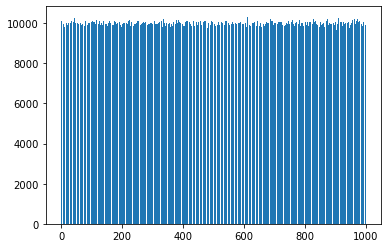

In [64]:
import random 
from matplotlib import pyplot as plt
import numpy as np

size = 1000
data = [0] * size

tests = 10000000
while tests > 0:
    data[random.randint(0,len(data)-1)] += 1
    tests -= 1

fig = plt.figure()
plt.bar(np.arange(0,len(data)), data)
fig.savefig('Random.png', dpi=150, transparent=True)

In [67]:
import random
print(random.seed(42))

import numpy as np
print(np.random.seed(42))

None
None


In [69]:
import random
random.seed(42)
st = random.getstate()
for r in range(0,5):
    random.setstate(st)
    print(f"Repetition {r}:")
    ints = []
    for i in range(0,10):
        ints.append(random.randint(0,10))
    print(f"\t{ints}")

Repetition 0:
	[10, 1, 0, 4, 3, 3, 2, 1, 10, 8]
Repetition 1:
	[10, 1, 0, 4, 3, 3, 2, 1, 10, 8]
Repetition 2:
	[10, 1, 0, 4, 3, 3, 2, 1, 10, 8]
Repetition 3:
	[10, 1, 0, 4, 3, 3, 2, 1, 10, 8]
Repetition 4:
	[10, 1, 0, 4, 3, 3, 2, 1, 10, 8]
